In [1]:
from IPython import get_ipython
from scipy import signal
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
vx = 5


m = 8000.0 #Kg
C_alpha_f = 60000.0 #N/rad
C_alpha_r = 60000.0 #N/rad
Izz = 5650.0 #kg m^2
a = 1.0 #m
b = 2.5 #m

In [3]:
A = np.array(
    [
        [-(C_alpha_f + C_alpha_r) / (m * vx),           (-a * C_alpha_f + b * C_alpha_r) / (m*vx) - vx],
        [-(a * C_alpha_f - b * C_alpha_r) / (Izz * vx),   -(a**2 * C_alpha_f + b**2 * C_alpha_r) / (Izz*vx)]
    ]
            )

B = np.array(
    [
        [C_alpha_f/m],
        [(a * C_alpha_f) / Izz]
    ]
)

C = np.array(
    [
        [1,0],
        [0,1]
    ]
)

D = np.array([[0],[0]])

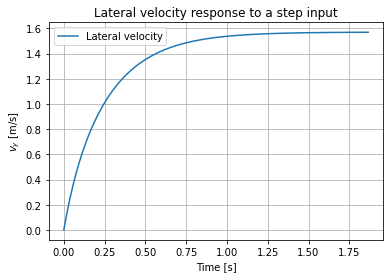

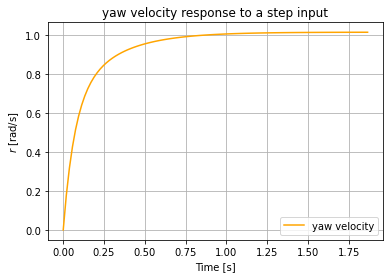

In [4]:
sys = signal.StateSpace(A,B,C,D)

t,y = signal.step(sys)
vy = y[:,0]
r = y[:,1]

# Plot lateral velocity
plt.figure()
plt.plot(t,vy)
plt.title("Lateral velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$v_y$ [m/s]")
plt.legend(["Lateral velocity"])
plt.grid(True)

# Plot the yaw rate
plt.figure()
plt.plot(t,r, "orange")
plt.title("yaw velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$r$ [rad/s]")
plt.legend(["yaw velocity"])
plt.grid(True)